## Linear Regression with Multiple Features on Vehicle Dataset ... 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/Tutorial3/FeatureSelection.ipynb)

The topics covered in this exercise are: 

- [Get to know the Vehicle dataset](#data-visualization--preprocessing)
- [Linear model with all 8 features](#linear-regression-model-using-all-8-features)
    - [Training the model and inference](#perform-training-and-inference)
    - [Evaluation of the model](#model-evaluations)
- [Feature selection](#feature-selection)
    - [Correlation Matrix](#correlation-matrix-of-predictors-and-response)
- [Implementing some variable selection methods](#implementing-some-variable-selection-methods)
    - [Best subset selection](#best-subset-selection)
        - [Evaluation on the best subset](#test-with-the-selected-features-with-best-subset)
    - [Shinkage Method](#shrinkage-method)
        - [Lasso/Regression](#ridgelasso-regression)
        - [Evaluation on the set chosen by shinkage method](#test-with-the-selected-features-with-shrinkage-methods)
- [Performace Summary](#summary-of-all-three-methods) 

Here, we follow the content of variable selections from [Prof. Songsiri EE575 Chapter II Linear Regression](http://jitkomut.eng.chula.ac.th/ee575/linreg.pdf)

In [1]:
# ! pip install numpy pandas tqdm matplotlib statsmodels seaborn
# ! pip install -q kaggle

Download data from Kreggle website:

In [2]:
# ! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

In [3]:
import numpy as np
from numpy import linalg

import pandas as pd 
import matplotlib.pyplot as plt  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import metrics

import zipfile
foldername = "vehicle-dataset"

In [4]:
# Unzip the downloaded data and extract the files into the "vehicle-dataset" folder 

with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip","r") as zip_ref:
    zip_ref.extractall(foldername)

## Data Visualization & Preprocessing

Dataframe contains 9 attributes: Car_name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner

In [5]:
df = pd.read_csv('%s/car data.csv' % foldername)
df.iloc[:4]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


To check the statistics for the non-text attributes

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Encode target labels with value between 0 and n_classes-1.

In [7]:
print("Raw value before Encoding ...")
## print(np.unique(df['Car_Name'].values))
#print(np.unique(df['Transmission'].values))
#print(np.unique(df['Fuel_Type'].values))
#print(np.unique(df['Seller_Type'].values))

df[['Car_Name', 'Fuel_Type','Seller_Type','Transmission']] = df.loc[:,['Car_Name', 'Fuel_Type','Seller_Type','Transmission']].apply(LabelEncoder().fit_transform)
print("After Encoding: ")
# print(np.unique(df['Car_Name'].values))
print(np.unique(df['Transmission'].values))
print(np.unique(df['Fuel_Type'].values))
print(np.unique(df['Seller_Type'].values))

Raw value before Encoding ...
After Encoding: 
[0 1]
[0 1 2]
[0 1]


Summary of each attributes:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


## Linear Regression Model using all 8 features

### Data Separation for Training and Testing Sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Feat_List = ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type','Seller_Type','Transmission', 'Owner']
X = df.loc[:, Feat_List].values
y = df['Selling_Price'].values.reshape(-1,1)

In [11]:
X_train_, X_test_, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

XStandardScaler = StandardScaler()
X_train        = XStandardScaler.fit_transform(X_train_)
X_test         = XStandardScaler.transform(X_test_) 

YStandardScaler = StandardScaler()
y_train          = YStandardScaler.fit_transform(y_train_) 

### Perform Training and Inference

In [12]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

### Model Evaluations

In [13]:
y_pred    = regressor.predict(X_test)
y_pred = min_max_scaler_Y.inverse_transform(y_pred)

In [14]:
from sklearn import metrics

print("# If you use all 8 features you will get the following stats...")
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2score:",metrics.r2_score(y_test,y_pred))

Test_Eval = {}
Test_Eval["AllFeat"] =  {   "MAE": metrics.mean_absolute_error(y_test,y_pred), 
                            "MSE": metrics.mean_squared_error(y_test,y_pred),
                            "RMSE" : np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                            "R2score": metrics.r2_score(y_test,y_pred),
                            "#Params": X_train.shape[1]  ,
                             "y_pred": y_pred}  


# If you use all 8 features you will get the following stats...
MAE: 0.9992677375917862
MSE: 2.186818919090543
RMSE: 1.4787896804787837
R2score: 0.9134869106859306


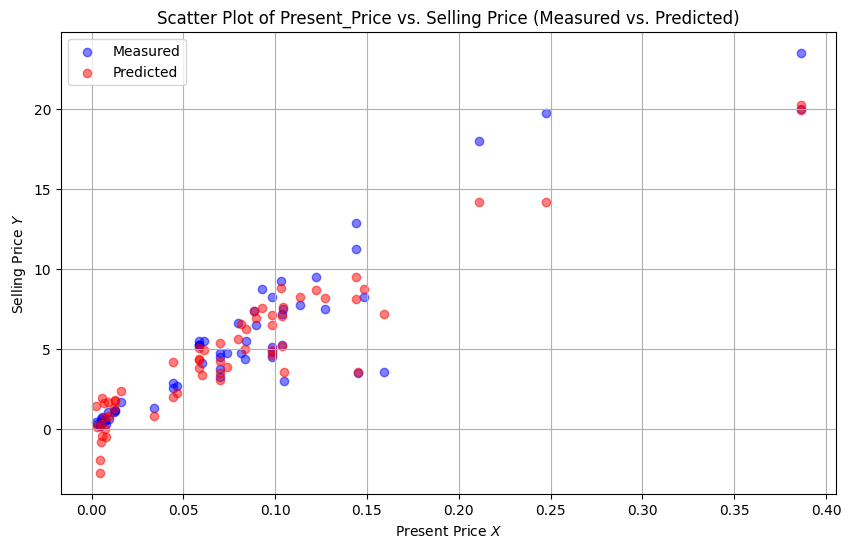

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,2], y_test, alpha=0.5, label='Measured', c='blue')
plt.scatter(X_test[:,2], y_pred, alpha=0.5, label='Predicted', c='red')
plt.xlabel("Present Price $X$")
plt.ylabel("Selling Price $Y$")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Measured vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Selection

Some of the features have the clear relationship to the prediction results, e.g., Present Price vs Selling Price.'
You can gauge these relationships with the correlation matrix: 

## Correlation matrix of predictors and response

In [16]:
import seaborn as sns

However, some of these relationships are rather difficult to interprete. 

Take for example, 
-  `Year` is moderately correlated with `Selling Price` at 0.24, but only midely impact the Present Price  at -0.048.
-  `Kms_Drive` is moderately correlated with `Present Price` at 0.2, but only midely impact the Selling Price at 0.029.

We can say that `Year` are redundant with `Selling Price`. But where there is negative, mild impact, it is not easy to interprete...  


So, we need varaible selection methods to help us check...   

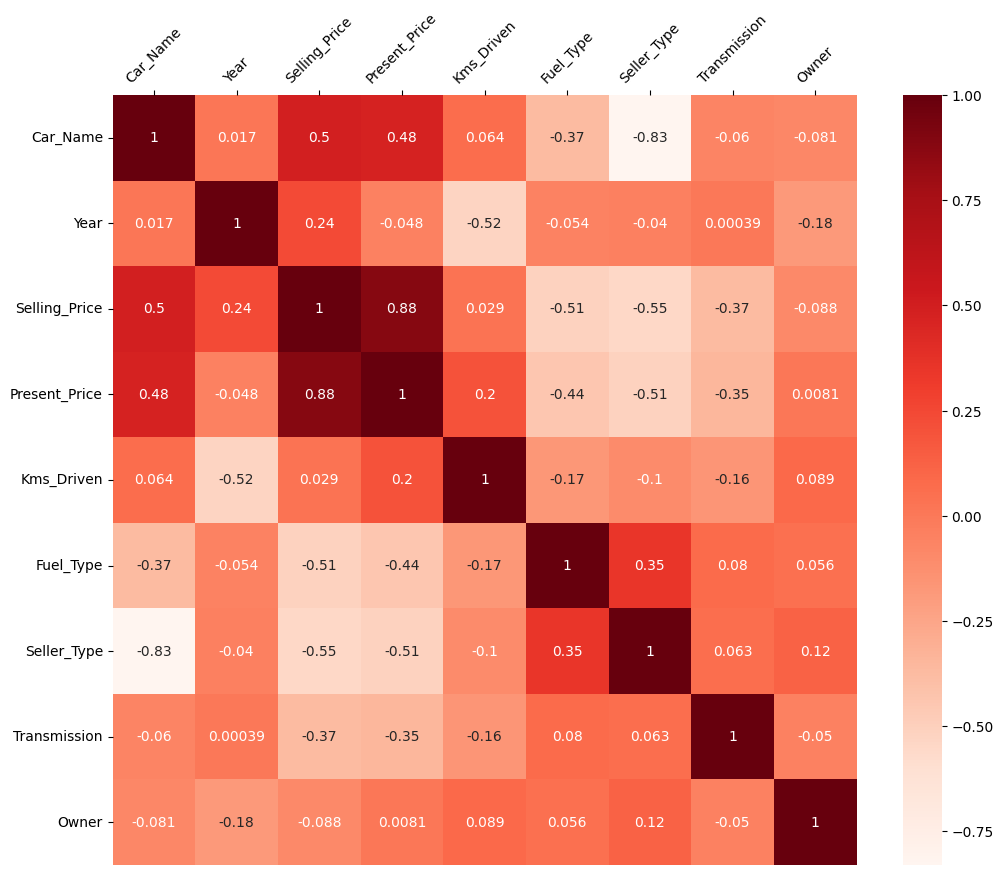

In [17]:
plt.figure(figsize=(12,10))
cor = df.corr()
g = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) 
g.axes.xaxis.set_ticks_position("top")
plt.setp(g.axes.get_xticklabels(), rotation=45)
plt.show()

## Implementing some variable selection methods
 

- The following contents adop the descriptions from [Prof. Songsiri EE575 Chapter II Linear Regression](http://jitkomut.eng.chula.ac.th/ee575/linreg.pdf)
- Some parts of the code follow the answers in [discussion in this JupyterNotebook](https://nbviewer.org/github/pedvide/ISLR_Python/blob/master/Chapter6_Linear_Model_Selection_and_Regularization.ipynb#6.5.1-Best-Subset-Selection)  

### Best subset selection 

In [18]:
from itertools import combinations

# Suppose that we are intrested in the possible combination when 2 features are chosen from 8 features
list(combinations(range(8), 2) )

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (6, 7)]

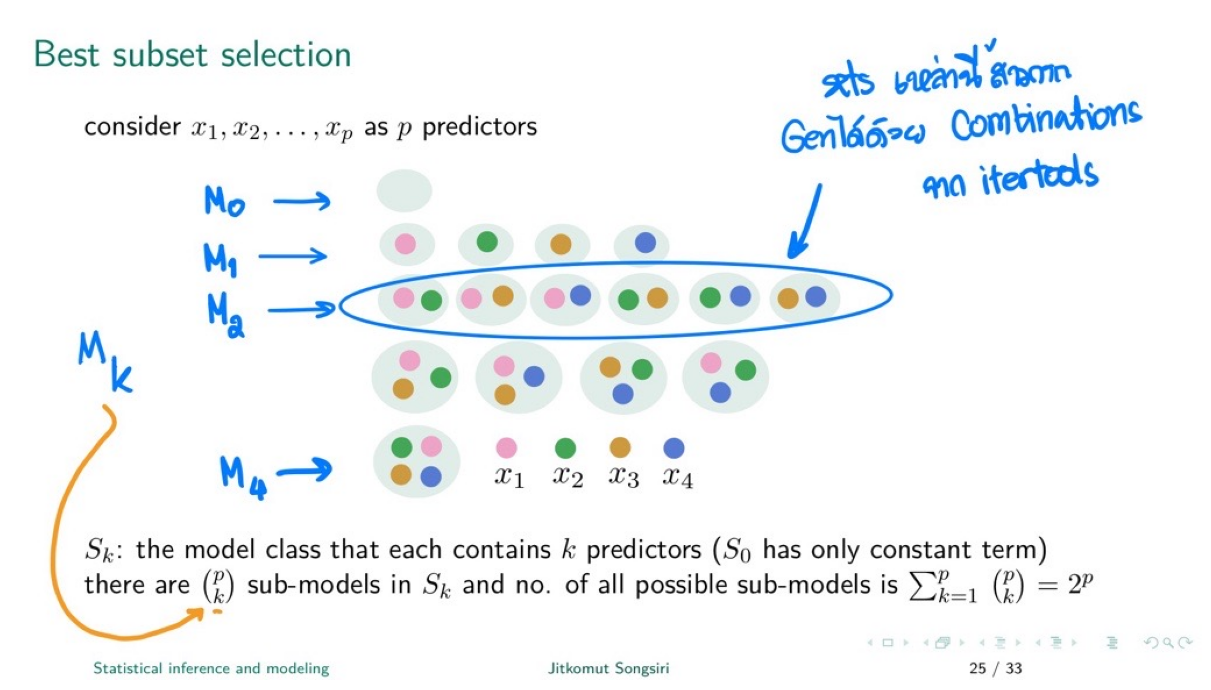

In [19]:
plt.figure(figsize=(21,7)); Image=plt.imread("figures/BSS1.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

In [20]:
n_features         = 8
max_combination    = 7

subsets = []

# We create M_1, M_2, M_3, when 1, 2, and 3 features are chosen from 8 features
# Each M_2, for example, will contain subset of the possible combinations... ie [0,1], [0,2], [1, 2], ... [6,7] 
for k in range(min(n_features, max_combination)): 
    subsets.append(list(combinations(range(n_features), k + 1)))

print("M1")
print(subsets[0])

print("M2")
print(subsets[1])

print("M3")
print(subsets[2])

M1
[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,)]
M2
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]
M3
[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 5, 6), (0, 5, 7), (0, 6, 7), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 5, 6), (1, 5, 7), (1, 6, 7), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 3, 7), (2, 4, 5), (2, 4, 6), (2, 4, 7), (2, 5, 6), (2, 5, 7), (2, 6, 7), (3, 4, 5), (3, 4, 6), (3, 4, 7), (3, 5, 6), (3, 5, 7), (3, 6, 7), (4, 5, 6), (4, 5, 7), (4, 6, 7), (5, 6, 7)]


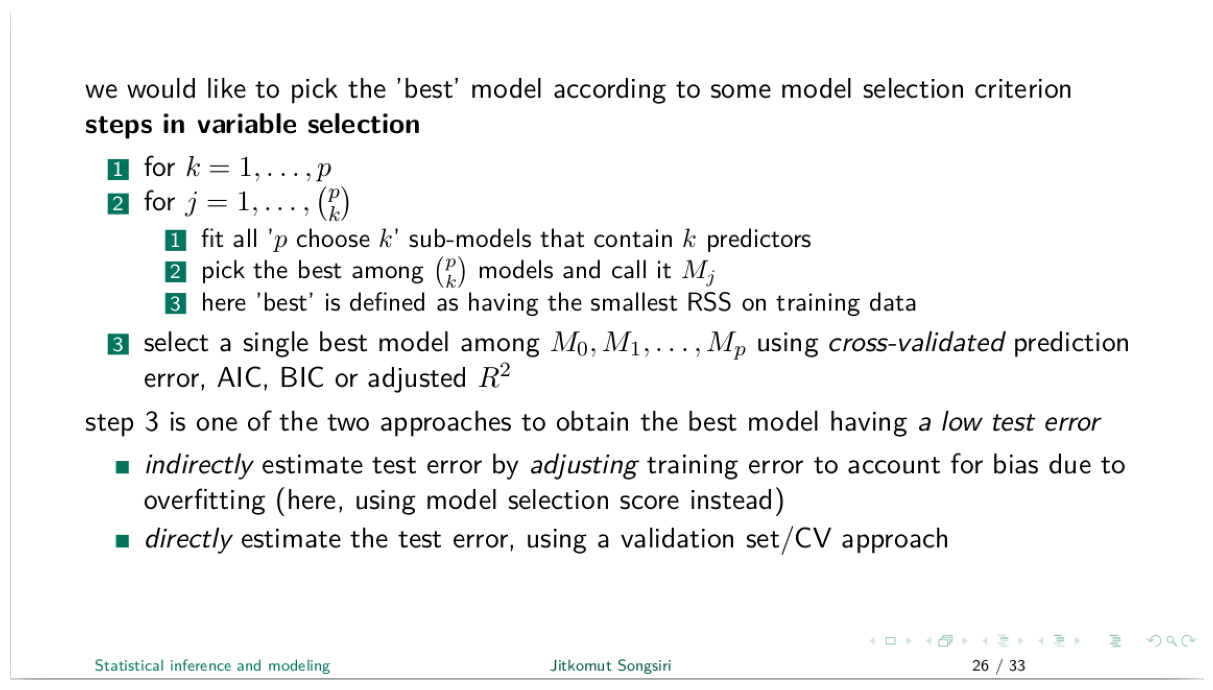

In [21]:
plt.figure(figsize=(21,7)); Image = plt.imread("figures/BSS2.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

regressor = LinearRegression()

best_size_subset = []

for subsets_k in subsets:
    
    best_score  = -np.inf
    best_subset = None

    for fsets in subsets_k:

        # Step 2.1: Fit the model with the chosen features
        regressor.fit(X_train[:, list(fsets)],y_train)
        
        
        X_fset = X_train[:, list(fsets)]

        # Step 2.2: Find the best model among the chosen number of features 
        # By default regressor.score will use R^2 score
        score = regressor.score(X_fset, y_train) 

        # Step 2.3: Find the best model using the training results
        if score > best_score:
            best_score = score
            best_fsets = fsets

    # Step 3:
    # to compare subsets of different sizes (M_1, M_2, M_3) 
    # we store the best subset of each size
    best_size_subset.append(best_fsets)


# Step 3 (Continue)
# Here, we can use cross validation to select the best model from M_1, M_2, M_3     
best_score = 0
best_feat_set = None
list_scores = []
for subset in best_size_subset:
    score = cross_val_score(regressor, X_train[:, list(subset)], y_train, cv=2).mean()
    list_scores.append(score)
    if score > best_score:
        best_score, best_subset = score, subset       



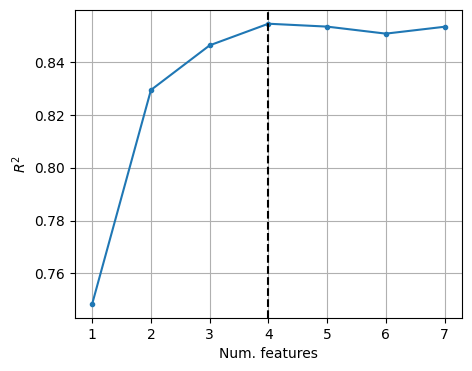

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(range(1,max_combination+1), list_scores, '.-')
ax.axvline(np.where(list_scores == max(list_scores))[0].item()+1, color='k', linestyle='--')
ax.set_xlabel('Num. features')
ax.grid(True)
ax.set_ylabel('$R^2$');

Print best subsets:

In [24]:
best_M = np.where(list_scores == max(list_scores))[0].item()
best_size_subset[best_M]

(1, 2, 4, 5)

#### Test with the selected features with best subset

In [25]:
regressor = LinearRegression()
regressor.fit(X_train[:, list(best_size_subset[best_M])], y_train)

y_pred    = regressor.predict(X_test[:, list(best_size_subset[best_M])])
y_pred    = min_max_scaler_Y.inverse_transform(y_pred)

In [26]:
print("# For the 4 best subset of features, you will get the following stats...")
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2score:",metrics.r2_score(y_test,y_pred))
 
Test_Eval["BestSub"] =  {   "MAE": metrics.mean_absolute_error(y_test,y_pred), 
                            "MSE": metrics.mean_squared_error(y_test,y_pred),
                            "RMSE" : np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                            "R2score": metrics.r2_score(y_test,y_pred),
                            "#Params": len(list(best_size_subset[best_M]) ) ,
                            "y_pred": y_pred}  

# For the 4 best subset of features, you will get the following stats...
MAE: 1.0425209318940212
MSE: 2.453532939712243
RMSE: 1.566375733887704
R2score: 0.9029353951096176


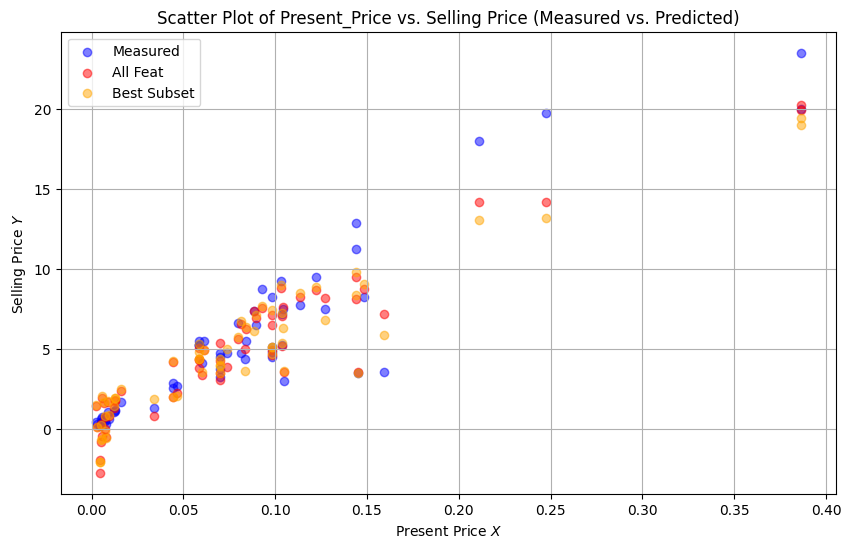

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,2], y_test, alpha=0.5, label='Measured', c='blue')
plt.scatter(X_test[:,2], Test_Eval["AllFeat"]["y_pred"], alpha=0.5, label='All Feat', c='red')
plt.scatter(X_test[:,2], Test_Eval["BestSub"]["y_pred"], alpha=0.5, label='Best Subset', c='orange')
plt.xlabel("Present Price $X$")
plt.ylabel("Selling Price $Y$")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Measured vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

### Other alternatives: Forward/Backward Selection

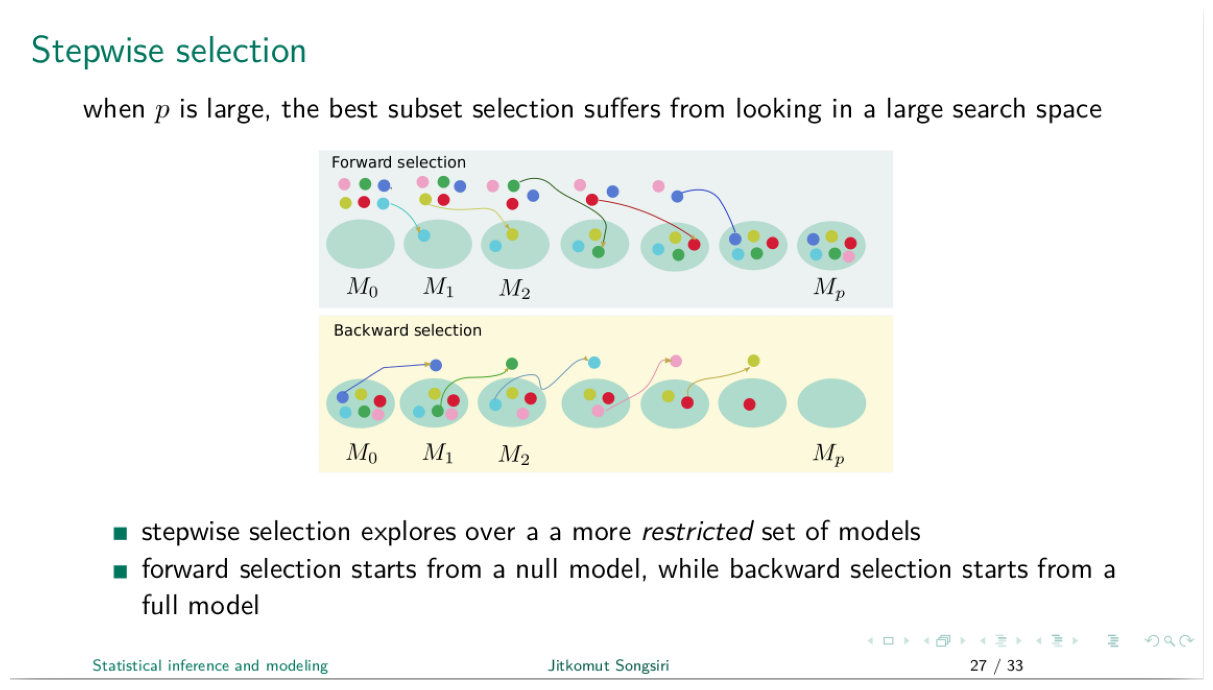

In [28]:
plt.figure(figsize=(21,7)); Image = plt.imread("figures/BSS3.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

## Shrinkage method

In [29]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

reg_model = {"Ridge": [Ridge, RidgeCV], "Lasso": [Lasso, LassoCV] }  

def my_regressor(alpha, X, y, model = reg_model["Ridge"][0]):
    chosen_model = model(alpha=alpha)
    chosen_model.fit(X, y)  
    return chosen_model

def my_cv(lambdas, X, y, model = reg_model["Ridge"][1]):
    myCV = model(alphas=lambdas, store_cv_values=True)
    myCV.fit(X, y) 
    return myCV

### Ridge/Lasso Regression

In [30]:
n_lambdas    = 10
chosen_model = "Ridge"
lambdas = np.logspace(-2, 2, n_lambdas)

In [31]:
myCVModel = my_cv(lambdas, X_train, y_train, model = reg_model[chosen_model][1]) 
MSE_alphas = np.mean(myCVModel.cv_values_, axis=0)

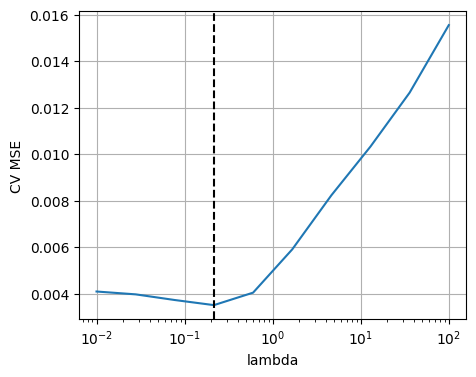

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(lambdas, MSE_alphas.reshape(-1))  
ax.set_xscale('log') 
ax.axvline(myCVModel.alpha_, color='k', linestyle='--')
ax.grid(True)
ax.set_xscale('log')
ax.set_xlabel('lambda')
ax.set_ylabel('CV MSE') 
plt.show()

In [33]:
lasso_loc = np.where(MSE_alphas.reshape(-1) == MSE_alphas.reshape(-1).min())[0].item() 

In [34]:
coefs = []
scores = []
for lam in lambdas:
    lasso = my_regressor(lam, X_train, y_train, model = reg_model[chosen_model][0]) 
    
    coefs.append(lasso.coef_)
    scores.append(lasso.score(X_train, y_train))

coefs = np.stack(coefs,axis=1)
coefs = coefs.reshape(n_lambdas, n_features)

ind = np.argpartition(np.abs(coefs[0,:]), -4)[-4:]
TopFeat = [Feat_List[i] for i in list(ind)]

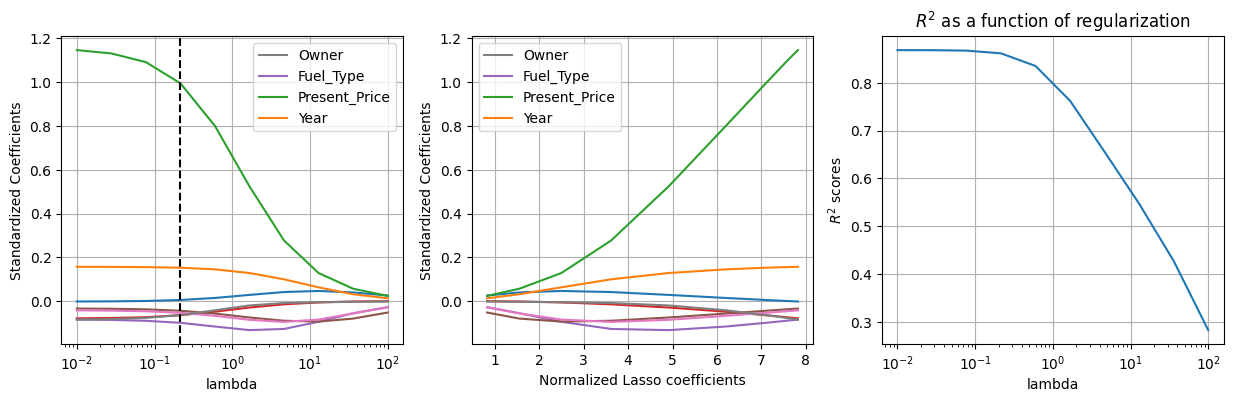

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
 
# firt plot
ax1.plot(lambdas, coefs) 
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlabel('lambda')
ax1.set_ylabel('Standardized Coefficients') 
ax1.axvline(myCVModel.alpha_, color='k', linestyle='--')
ax1.legend(np.array(ax1.get_lines())[ind], TopFeat)

no_lasso_norm = linalg.norm(coefs[:,0], ord=1) 
norm_coefs = linalg.norm(coefs/no_lasso_norm, axis=1, ord=1) 
ax2.plot(norm_coefs, coefs)
ax2.grid(True) 
ax2.set_xlabel('Normalized Lasso coefficients')
ax2.set_ylabel('Standardized Coefficients') 
ax2.legend(np.array(ax2.get_lines())[ind], TopFeat) 


# third
ax3.plot(lambdas, scores) 
ax3.grid(True)
ax3.set_xscale('log')
ax3.set_xlabel('lambda')
ax3.set_ylabel('$R^2$ scores')
ax3.set_title('$R^2$ as a function of regularization');

Get the selected features

In [36]:
coefs[lasso_loc,:]

array([ 0.00572986,  0.1529485 ,  0.99450675, -0.06381522, -0.09856967,
       -0.04345486, -0.05281049, -0.06314919])

#### Test with the selected features with Shrinkage Methods

In [37]:
threshold = 0.05 # You can try to vary for other threshold

selected_features = (np.abs(coefs[lasso_loc,:]) > threshold)

X_train[:, selected_features].shape

regressor = LinearRegression()
regressor.fit(X_train[:, selected_features], y_train)

y_pred    = regressor.predict(X_test[:, selected_features])
y_pred    = min_max_scaler_Y.inverse_transform(y_pred)

In [38]:
print("# For Shrinkage features, you will get the following stats...")
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2score:",metrics.r2_score(y_test,y_pred))
 
Test_Eval["Shrinkage"] =  {  "MAE": metrics.mean_absolute_error(y_test,y_pred), 
                            "MSE": metrics.mean_squared_error(y_test,y_pred),
                            "RMSE" : np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                            "R2score": metrics.r2_score(y_test,y_pred),
                            "#Params": (selected_features == True).sum(),
                            "y_pred": y_pred}  

# For Shrinkage features, you will get the following stats...
MAE: 1.115906627274801
MSE: 2.3945917121076663
RMSE: 1.5474468366013956
R2score: 0.9052671783421115


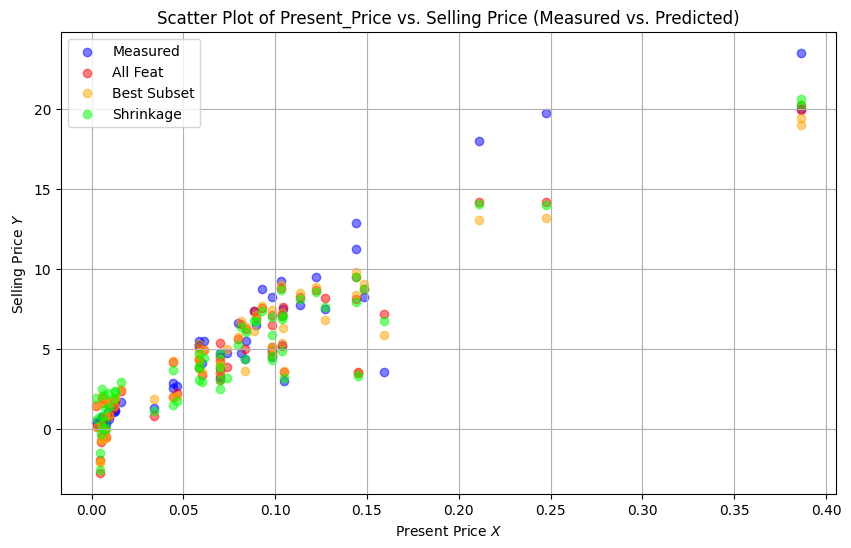

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,2], y_test, alpha=0.5, label='Measured', c='blue')
plt.scatter(X_test[:,2], Test_Eval["AllFeat"]["y_pred"], alpha=0.5, label='All Feat', c='red')
plt.scatter(X_test[:,2], Test_Eval["BestSub"]["y_pred"], alpha=0.5, label='Best Subset', c='orange')
plt.scatter(X_test[:,2], Test_Eval["Shrinkage"]["y_pred"], alpha=0.5, label='Shrinkage', c='lime')
plt.xlabel("Present Price $X$")
plt.ylabel("Selling Price $Y$")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Measured vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()

### Summary of all three methods

In [40]:
print( "      %s, %s, %s "           % (list(Test_Eval.keys())[0], list(Test_Eval.keys())[1], list(Test_Eval.keys())[2]))
print( "    MAE: %.2f, %.2f, %.2f "  % (Test_Eval["AllFeat"]["MAE"], Test_Eval["BestSub"]["MAE"], Test_Eval["Shrinkage"]["MAE"]))
print( "    MSE: %.2f, %.2f, %.2f "  % (Test_Eval["AllFeat"]["MSE"], Test_Eval["BestSub"]["MSE"], Test_Eval["Shrinkage"]["MSE"]))
print( "   RMSE: %.2f, %.2f, %.2f "  % (Test_Eval["AllFeat"]["RMSE"], Test_Eval["BestSub"]["RMSE"], Test_Eval["Shrinkage"]["RMSE"]))
print( "R2score: %.2f, %.2f, %.2f "  % (Test_Eval["AllFeat"]["R2score"], Test_Eval["BestSub"]["R2score"], Test_Eval["Shrinkage"]["R2score"]))
print( "#Params: %d, %d, %d "  % (Test_Eval["AllFeat"]["#Params"], Test_Eval["BestSub"]["#Params"], Test_Eval["Shrinkage"]["#Params"]))

      AllFeat, BestSub, Shrinkage 
    MAE: 1.00, 1.04, 1.12 
    MSE: 2.19, 2.45, 2.39 
   RMSE: 1.48, 1.57, 1.55 
R2score: 0.91, 0.90, 0.91 
#Params: 8, 4, 6 
